<a href="https://colab.research.google.com/github/CypriLepto/Basic-Sentiment-Analysis-with-TensorFlow/blob/main/MINTA_KuVaAlapjan_NApimigarns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adattudomány és gépi tanulás**

*Sentiment analysis-hez kapcsolódó részek*

In [111]:
#A Szovegkorpusz betöltése

import pandas as pd

url = "http://qta.tk.mta.hu/uploads/files/napimigrans_corpus.csv"
corpus_df = pd.read_csv(url, sep='\t', header=None, encoding='utf-8')
corpus_df.columns = ['url', 'text'] # két változó elnevezése
corpus_df.head(10)

,url,text
0,http://napimigrans.com/egykori-szexrabszolgakb...,"2016-02-11 Több száz, egykor az ISIS fogságába..."
1,http://napimigrans.com/egy-muszlim-rab-megprob...,2016-02-12 Washington – A 25 éves muszlim fogv...
2,http://napimigrans.com/magyarorszag-fele-szori...,2016-02-21 Horvátország nem engedi tovább a Sz...
3,http://napimigrans.com/vajon-mikor-hal-meg-az-...,"2016-02-24 A népvándorlás nem más, mint egy ol..."
4,http://napimigrans.com/a-parizsi-gyilkosok-sem...,2016-02-16 MILOS ZEMAN A KORÁNRA HIVATKOZIK – ...
5,http://napimigrans.com/verfurdot-rendezett-az-...,2016-02-09 Több mint 300 embert végeztek ki az...
6,http://napimigrans.com/video-oriasi-tuntetes-a...,2016-02-21 Minnesota – Úgy látszik az USA-ban ...
7,http://napimigrans.com/video-220-milliot-kolte...,"2016-02-24 Még 2014-ben szó volt róla, hogy né..."
8,http://napimigrans.com/hogyan-romboljuk-le-a-h...,2016-02-21 Az értékek viszonylagosak. Más kult...
9,http://napimigrans.com/europa-megeroszakolasa-...,2016-02-18 Meghökkentő címlappal jelent meg a ...


In [112]:
corpus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     168 non-null    object
 1   text    168 non-null    object
dtypes: object(2)
memory usage: 2.8+ KB


In [113]:
#Szövegkorpusz előkészítése
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import unicodedata

In [114]:
#Definiáljuk a szótövesítést végző objektumot (stemmer) a magyar nyelvre, továbbá
#töltsük le az NLTK-hoz kapcsolódó, tiltólistás szavakat tartalmazó fájlokat.
stemmer = SnowballStemmer("hungarian")
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [116]:
#Munkánk megkönnyítése érdekében hozzunk létre egy függvényt, mely a számára
# értékként (argumentumként) megadott szöveget kisbetűsíti, eltávolítja az
# írásjeleket, kiszűri a tiltólistás szavakat, majd záró lépésként elvégzi a szótövesítést
# is.

import unicodedata

def strip_punctuation(text):
    punctuation_cats = set(['Pc', 'Pd', 'Ps', 'Pe', 'Pi', 'Pf', 'Po'])
    return ''.join(x for x in text if unicodedata.category(x) not in punctuation_cats)

# A fenti függvény röviden összefoglalva összeveti az általa kapott szöveglánc
# elemeit az írásjelekhez tartozó Unicode-kategóriákkal. Ez a függvény végzi tehát
# az írásjelek eltávolítását.




In [117]:
# Az írásjeleket eltávolító függvény birtokában már megalkothatjuk az egyes
# cikkek szövegét tokenizáló függvényt, úgy, hogy kimeneti értéke az előkészített
# szöveg szavainak listája legyen.

def tokenize_article(text):
  text = text.lower()
  text = strip_punctuation(text)
  tokenized_text = word_tokenize(text)
  tokenized_text = [word for word in tokenized_text
    if word not in stopwords.words('hungarian')]
  tokenized_text = map(stemmer.stem,tokenized_text)
  return tokenized_text

In [118]:
# Próbaképp alkalmazzuk az előbb létrehozott függvényt korpuszunk első mondatára,
# illetve (mivel az előbb megadott függvény szavak listáját adja vissza)
# vonjuk össze a lista elemeit szóközzel elválasztott karakterlánccá.
#print(' '.join(tokenize_article(corpus_df['text'][0])))

print(' '.join(tokenize_article(corpus_df['text'][0])))
# Az eredeti (átalakítás előtti) mondat még a következőképp festett:
# 2016-02-11 Több száz, egykor az ISIS fogságában, szexrabszolgaként szenvedő nő
# csatlakozott ahhoz az iraki egységhez, mely a Nap Hölgyeinek nevezi magát

20160211 száz egy isis fogság szexrabszolg szenvedő nő csatlakozot ir egység nap hölgy nevez cél tűzte kiirts írmag őket brutális megkínzó élet eset ör tönkretevő terrorszervezet egység jelenleg körülbel 2000 nő szolgál ők min ember sikeres elszökt terrorista tábor borzalmas kínzás élt mindennap többször megerőszakolta őket mindez vég nézze család szerett kiirtott milíc 2014ben ere tel falv rohan le szemrevalóbb nők lány kivétel minden lemészárol bosszú reményétől vezetv tervez résztvesz mosz ellen offenzív iszla áll nevező szervez ir központ ahonn egység legtöbb tag elszököt milicista id adta őket khat khider parancsn szolgál egység nyilatkozt médiainterjú sor háború dúl vég asszony lesz áldozat megvéd mag gonosz megvéd kisebbség régió érd megtesz tőlün kér khat egy 100 jazid nőnek ak kur peshmarg tiszt képezt nap hölgy egység harcolhass háború sor körülbel isis 56000 jazid ejtet fogság többszörös irtott nagy 2000nek sikerül megszökn fogság egyes önerőből más terrorellenes szervezet s

##A szöveges adatok elemezhető formába hozása##*dőlt szöveg*

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=tokenize_article)
document_term_matrix =vectorizer.fit_transform(corpus_df[['text']])



/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [125]:
# Az előbbi műveletekkel meg is kaptuk a dokumentum-kifejezés mátrixunkat,
# azonban az előző fejezet szógyakoriságokat tartalmazó mátrixával szemben
# most próbálkozzunk meg a korábbiakban már röviden megemlített szógyakorisági-
# inverz szógyakorisági (term frequency-inverse term frequency, TF-IDF)
# súlyozással is. A TF-IDF súlyozási eljárás egy statisztikai módszer az egyes
# (akár több szóból álló) kifejezések „fontosságának” mérésére a szövegkorpusz
# egyedi szövegeire vetítve. A szövegkorpusz szövegeiben egyenletesen gyakori
# kifejezéshez kisebb súly, míg a néhány szövegben gyakorta előforduló elemekhez
# nagyobb súly tartozik (Ali – Wang – Haddad, 2015). A scikit-learn
# a TfidfTransformer nevű osztály formájában a TF-IDF súlyozáshoz is egy egyszerű
# megoldást kínál:


from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(document_term_matrix)

In [128]:
tfidf_matrix

<168x8248 sparse matrix of type '<class 'numpy.float64'>'
	with 19408 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


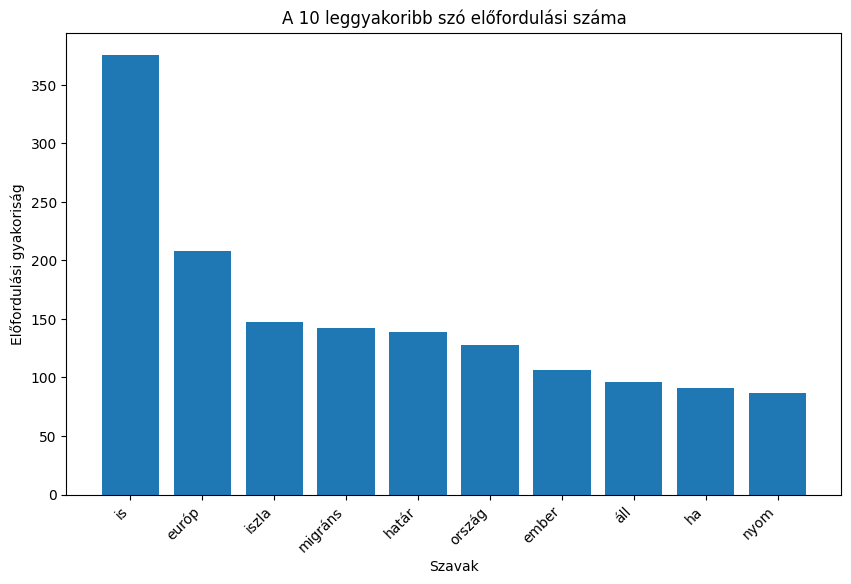

In [129]:

import numpy as np
import matplotlib.pyplot as plt

# Szöveg tokenizálása (listává alakítjuk a map-et)
def tokenize_article(text):
    text = text.lower()
    text = strip_punctuation(text)
    tokenized_text = word_tokenize(text)
    tokenized_text = [word for word in tokenized_text if word not in stopwords.words('hungarian')]
    tokenized_text = [stemmer.stem(word) for word in tokenized_text]  # Módosítás: map helyett listaként adjuk vissza
    return tokenized_text

# A dokumentum-kifejezés mátrix újbóli előállítása a javított tokenize_article segítségével
vectorizer = CountVectorizer(tokenizer=tokenize_article)
document_term_matrix = vectorizer.fit_transform(corpus_df['text'])

# Szavak listája
words = vectorizer.get_feature_names_out()

# Szavak összgyakoriságának kiszámítása
word_freq = np.asarray(document_term_matrix.sum(axis=0)).flatten()

# A 10 leggyakoribb szó kiválasztása
top_indices = word_freq.argsort()[-10:][::-1]  # Gyakoriság szerint rendezés
top_words = [words[i] for i in top_indices]    # A 10 leggyakoribb szó
top_frequencies = word_freq[top_indices]       # A gyakoriságuk

# Az adatok kirajzolása
plt.figure(figsize=(10,6))
plt.bar(top_words, top_frequencies)
plt.xlabel('Szavak')
plt.ylabel('Előfordulási gyakoriság')
plt.title('A 10 leggyakoribb szó előfordulási száma')
plt.xticks(rotation=45, ha='right')  # A szavak jobban olvashatóvá tétele
plt.show()


##A szövegek hasonlóságának mérése: a koszinuszhasonlóság

In [134]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim_matrix = cosine_similarity(tfidf_matrix)
cos_sim_matrix

array([[1.        , 0.03714459, 0.00683204, ..., 0.01371461, 0.0283652 ,
        0.01333446],
       [0.03714459, 1.        , 0.01294815, ..., 0.        , 0.01837278,
        0.00362946],
       [0.00683204, 0.01294815, 1.        , ..., 0.00786881, 0.01534209,
        0.02308356],
       ...,
       [0.01371461, 0.        , 0.00786881, ..., 1.        , 0.00699566,
        0.        ],
       [0.0283652 , 0.01837278, 0.01534209, ..., 0.00699566, 1.        ,
        0.02411675],
       [0.01333446, 0.00362946, 0.02308356, ..., 0.        , 0.02411675,
        1.        ]])

In [139]:
cos_sim_matrix.shape

(168, 168)

In [124]:
tfidf_matrix.shape

(1, 1)

In [167]:
# import numpy as np
# print np.argmax(cos_sim_matrix[0,1:])
# print cos_sim_matrix[0,1:][50]
# print corpus_df['text'][51]

In [168]:
import numpy as np

# Koszinusz hasonlósági mátrix legnagyobb értékének indexe az első dokumentumra vonatkozóan
max_index = np.argmax(cos_sim_matrix[0, 1:])

# Kiírjuk a legnagyobb hasonlósági értéket, és hozzáadunk 1-et az indexhez, mert az első oszlopot kihagyjuk
print("A legnagyobb koszinusz hasonlóság indexe az első dokumentumhoz:", max_index + 1)

# Kiírjuk a legnagyobb hasonlósági értéket az első dokumentumhoz
print("A legnagyobb koszinusz hasonlóság értéke:", cos_sim_matrix[0, 1:][max_index])

# Kiírjuk a megfelelő dokumentum szövegét a corpus_df-ben
print("Dokumentum szövege a megadott indexhez:", corpus_df['text'].iloc[max_index + 1])


A legnagyobb koszinusz hasonlóság indexe az első dokumentumhoz: 51
A legnagyobb koszinusz hasonlóság értéke: 0.11020157142245054
Dokumentum szövege a megadott indexhez: 2016-02-12 Néhány élelmiszer ára rendkívüli módon megemelkedett az utóbbi hetekben Deir Ez-Zour több, az Iszlám Állam által körbezárt és ostrom alatt tartott kerületének piacain. Ugyanakkor itt legalább van élelmiszer, nem úgy, mint az ISIS illetve a „mérsékelt” ellenzék által uralt területeken – például Madayában – ahol a terrorcsoportok szabályosan éheztetik a lakosságot. Elöljáróban annyit mindenképpen fontos tudni, hogy míg négy évvel ezelőtt 1 szír font 4 forintot ért, addig ma 1 forint már körülbelül 1,5 szír fontba kerül – ez a hiperinfláció a háború „természetes” velejárója, sajnos… Az átlagkereset Szíriában az elmúlt négy év során körülbelül 20-30%-kal növekedett, az élelmiszerárak viszont ennek többszörösével. Az átlagkereset jelenleg havi 25 ezer szír font. Ez napjainkban körülbelül 60 euró, 2011-ben ugyanez 

In [169]:
print(corpus_df['text'].head())


0    2016-02-11 Több száz, egykor az ISIS fogságába...
1    2016-02-12 Washington – A 25 éves muszlim fogv...
2    2016-02-21 Horvátország nem engedi tovább a Sz...
3    2016-02-24 A népvándorlás nem más, mint egy ol...
4    2016-02-16 MILOS ZEMAN A KORÁNRA HIVATKOZIK – ...
Name: text, dtype: object


In [170]:
example_text = corpus_df['text'].iloc[0]
tokens = tokenize_article(example_text)
print(tokens)


['20160211', 'száz', 'egy', 'isis', 'fogság', 'szexrabszolg', 'szenvedő', 'nő', 'csatlakozot', 'ir', 'egység', 'nap', 'hölgy', 'nevez', 'cél', 'tűzte', 'kiirts', 'írmag', 'őket', 'brutális', 'megkínzó', 'élet', 'eset', 'ör', 'tönkretevő', 'terrorszervezet', 'egység', 'jelenleg', 'körülbel', '2000', 'nő', 'szolgál', 'ők', 'min', 'ember', 'sikeres', 'elszökt', 'terrorista', 'tábor', 'borzalmas', 'kínzás', 'élt', 'mindennap', 'többször', 'megerőszakolta', 'őket', 'mindez', 'vég', 'nézze', 'család', 'szerett', 'kiirtott', 'milíc', '2014ben', 'ere', 'tel', 'falv', 'rohan', 'le', 'szemrevalóbb', 'nők', 'lány', 'kivétel', 'minden', 'lemészárol', 'bosszú', 'reményétől', 'vezetv', 'tervez', 'résztvesz', 'mosz', 'ellen', 'offenzív', 'iszla', 'áll', 'nevező', 'szervez', 'ir', 'központ', 'ahonn', 'egység', 'legtöbb', 'tag', 'elszököt', 'milicista', 'id', 'adta', 'őket', 'khat', 'khider', 'parancsn', 'szolgál', 'egység', 'nyilatkozt', 'médiainterjú', 'sor', 'háború', 'dúl', 'vég', 'asszony', 'lesz'

##A felügyelet nélküli tanulási módszer alkalmazása

Az így előkészített korpuszt a K elemű klaszterezéssel mint felügyelet nélküli
tanulási módszerrel elemezzük.

In [171]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=1)
km.fit(tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=1)

In [172]:
memberships = list(km.labels_)
corpus_df['cluster_membership'] = memberships
corpus_df.head(10)

,url,text,cluster_membership,lda_doc_topics
0,http://napimigrans.com/egykori-szexrabszolgakb...,"2016-02-11 Több száz, egykor az ISIS fogságába...",1,1
1,http://napimigrans.com/egy-muszlim-rab-megprob...,2016-02-12 Washington – A 25 éves muszlim fogv...,4,3
2,http://napimigrans.com/magyarorszag-fele-szori...,2016-02-21 Horvátország nem engedi tovább a Sz...,2,0
3,http://napimigrans.com/vajon-mikor-hal-meg-az-...,"2016-02-24 A népvándorlás nem más, mint egy ol...",1,3
4,http://napimigrans.com/a-parizsi-gyilkosok-sem...,2016-02-16 MILOS ZEMAN A KORÁNRA HIVATKOZIK – ...,1,4
5,http://napimigrans.com/verfurdot-rendezett-az-...,2016-02-09 Több mint 300 embert végeztek ki az...,0,2
6,http://napimigrans.com/video-oriasi-tuntetes-a...,2016-02-21 Minnesota – Úgy látszik az USA-ban ...,1,3
7,http://napimigrans.com/video-220-milliot-kolte...,"2016-02-24 Még 2014-ben szó volt róla, hogy né...",0,3
8,http://napimigrans.com/hogyan-romboljuk-le-a-h...,2016-02-21 Az értékek viszonylagosak. Más kult...,1,2
9,http://napimigrans.com/europa-megeroszakolasa-...,2016-02-18 Meghökkentő címlappal jelent meg a ...,1,3


In [150]:
# Eredményeinkből látható a kialakult klaszterek elemszáma. Az 5 klaszter közül
# az első (a Python számozásában nulladik) csoport 57 cikkszöveget sűrít össze,
# mely mintegy kétszeresen meghaladja a többi, 20-30 közötti darab cikket egyesítő
# klaszterek elemszámát

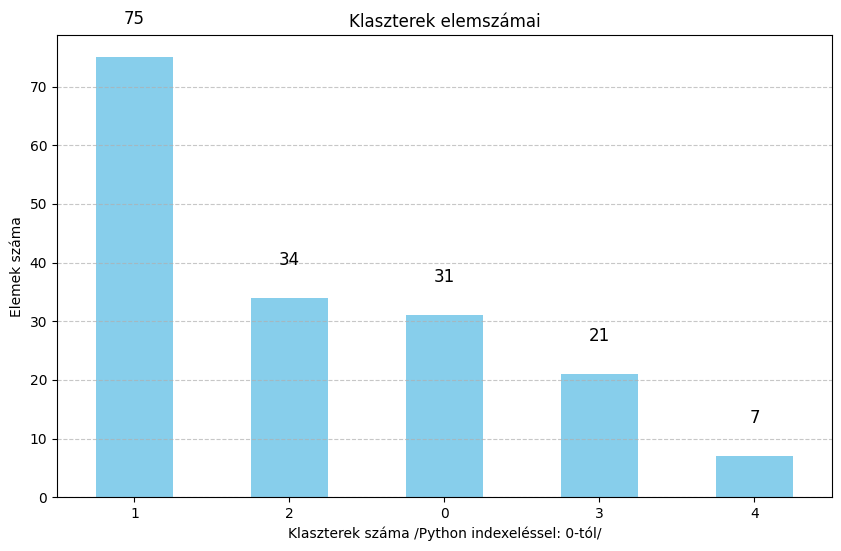

In [173]:
import matplotlib.pyplot as plt
import pandas as pd

# Feltételezzük, hogy a 'corpus_df' már tartalmazza a 'cluster_membership' oszlopot

# Kiszámítjuk a klaszterek elemszámait
cluster_sizes = corpus_df['cluster_membership'].value_counts()

# Ábrázoljuk az elemszámokat
plt.figure(figsize=(10, 6))
ax = cluster_sizes.plot(kind='bar', color='skyblue')

# Annotációk hozzáadása
for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 5,  # 5 pixel távolság az oszlop tetejétől
             f'{int(i.get_height())}', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Klaszterek elemszámai')
plt.xlabel('Klaszterek száma /Python indexeléssel: 0-tól/')
plt.ylabel('Elemek száma')
plt.xticks(rotation=0)  # Az x-tengely feliratainak vízszintesre állítása
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y-tengely menti rácsvonalak
plt.show()


In [152]:
# Vizsgáljuk meg az egyes klasztereket olyan módon, hogy kinyerjük az adott
# klaszterre leginkább jellemző 30 kifejezést, és tegyünk kísérletet az egyes klaszterek
# témáinak azonosítására! Ezt a klaszterközéppontok vizsgálatával tehetjük
# meg. Első lépésként gyűjtsük ki a mátrix egyes oszlopaihoz tartozó szavak listáját
# (feature names), a rangsorolt klaszterközéppontokat, majd írassuk ki az
# adott klaszter középpontját leginkább meghatározó 30 kifejezést.



# Kinyerjük a kifejezések listáját
terms = vectorizer.get_feature_names_out()
n_terms = len(terms)  # Jellemzők száma

# Rangsoroljuk a klaszterközéppontokat
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

# Kiírjuk az adott klaszter középpontját leginkább meghatározó 30 kifejezést
for i in range(0, 5):
    term_list = []
    for ind in order_centroids[i, :30]:
        if ind < n_terms:  # Ellenőrizzük, hogy az index érvényes-e
            term_list.append(terms[ind])
        else:
            term_list.append("N/A")  # Ha az index érvénytelen, helyettesítsük "N/A"-val
    print(f"Klaszter {i} legfontosabb kifejezései: {', '.join(term_list)}\n")


Klaszter 0 legfontosabb kifejezései: tör, áll, iszla, szíri, szír, katon, 20160224, hadsereg, is, város, 20160221, férf, kur, törökország, iszlamista, ir, nat, ellen, erdog, dollár, szervez, rész, orosz, nap, egység, tartomány, támadás, menekültszálló, iá, svéd

Klaszter 1 legfontosabb kifejezései: is, európ, ember, iszla, 20160222, rendőrség, év, férf, nyom, lány, muszl, éves, migráns, bevándorló, őket, ha, bűncselekmény, mag, gyer, vallás, miat, facebo, eset, németország, muzulm, kormány, ak, az, törvény, ké

Klaszter 2 legfontosabb kifejezései: határ, migráns, szerb, ország, is, macedón, illegális, európ, rendőr, kerítés, útvonal, határzár, határsértő, balkán, merkel, kancellár, görögország, vasárnap, szeged, magyar, bevándorló, vádlott, szám, migrációs, mti, ausztr, fogt, nyom, mondt, menekült

Klaszter 3 legfontosabb kifejezései: 20160214, közzétett, 2016, un, február, par, tvben, látsz, videó, franc, français, megin, métr, of, 14, holland, vaj, merkel, menekülttábor, 2015, di, el

##Érvényességvizsgálat egy alternatív módszerrel

In [153]:
from sklearn.decomposition import LatentDirichletAllocation

# LDA modell inicializálása
lda = LatentDirichletAllocation(n_components=5, random_state=1)

# Dokumentum-terem mátrix tanítása az LDA modell segítségével
lda.fit(document_term_matrix)


LatentDirichletAllocation(n_components=5, random_state=1)

In [154]:
lda.components_

array([[0.2000004 , 0.20000008, 0.20000017, ..., 0.20000007, 0.20000007,
        0.2000028 ],
       [0.20000062, 0.20000011, 1.19999904, ..., 0.20000011, 0.20000011,
        0.20000454],
       [3.20014803, 1.19999959, 0.20000028, ..., 1.19999962, 1.19999962,
        0.20000446],
       [1.1998817 , 0.20000007, 0.20000016, ..., 0.20000007, 0.20000007,
        1.1999824 ],
       [2.19996926, 0.20000015, 0.20000035, ..., 0.20000014, 0.20000014,
        0.20000579]])

In [155]:
# A modellbecslés lefutását követően a modellobjektumból kinyerhető az egyes
# témák kifejezéseloszlása

lda.components_

array([[0.2000004 , 0.20000008, 0.20000017, ..., 0.20000007, 0.20000007,
        0.2000028 ],
       [0.20000062, 0.20000011, 1.19999904, ..., 0.20000011, 0.20000011,
        0.20000454],
       [3.20014803, 1.19999959, 0.20000028, ..., 1.19999962, 1.19999962,
        0.20000446],
       [1.1998817 , 0.20000007, 0.20000016, ..., 0.20000007, 0.20000007,
        1.1999824 ],
       [2.19996926, 0.20000015, 0.20000035, ..., 0.20000014, 0.20000014,
        0.20000579]])

In [156]:
# A klaszterezés műveletéhez hasonlóan írassuk ki az egyes témák 30 legfontosabb
# szavát!
# A klaszterezés műveletéhez hasonlóan írassuk ki az egyes témák 30 legfontosabb szavát!

for topic_idx, topic in enumerate(lda.components_):
    print('Topic #%d:' % (topic_idx + 1))
    print(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-30 - 1:-1]]))


# Az LDA által azonosított első téma legnagyobb súllyal bíró szavai a következők:
# is, határ, európ, migráns, ország, szerb, bevándorló, nyom, unió, ha, rendőr, menekült,
# merkel, fog, magyar, vég, útvonal, magyarország, mti, kerítés, németország,
# ót, törökország, illegális, macedón, határsértő, év, ember, február, tör

Topic #1:
is európ határ migráns ország szerb bevándorló ha menekült unió merkel ném nyom ember ellen tanács törökország uniós rendőr mondt bűncselekmény magyarország nap magyar vég rész szám év németország miat
Topic #2:
is férf éves terrorist hadsereg város gyer őket rendőrség forrás tartomány biztonság ember egység katon ha nő később kisfiú menekült az miat németország terrorista dara ellen ir the isis nap
Topic #3:
is határ migráns ország kultúra város szerb egyenlő kultú kultúr ember európ ausztr ha tovább valamenny nyom menedékkérő útvonal rendőrség miat kur áll hatóság mti illegális ezer iszla őket hétfő
Topic #4:
is iszla európ áll ember ország tör allah év szír ha világ migráns rész szíri nap keresztény katon bevándorló ellen nyom vallás határ muszl mag törökország kor harc németország arab
Topic #5:
is férf ké nyom bíróság éves rendőrség szeged vádlott bűntett mag év vádlot ember határzár európ migráns ügyészség hár mti franc határsértő es határ le őket miat kerítés vasárnap 

In [88]:
# A kategória jól láthatóan hasonlít a K-közép klaszterezés során kapott kettes
# számú klaszterre. A téma cikkeiben az ISIS-ról, a közel-keleti fegyveres konfliktusról
# (hangsúlyosan a szíriai polgárháborúról), illetve a kurdokról esik szó.
# Az LDA témái közül az ötödik téma esetében a következő szavak dominálnak:
# un, par, vádlott, français, szeged, franc, femm, à, közzétett, bíróság, ausztrál, racism,
# 20160224, február, segély, százale, hét, le, 2016, mun, antiblanc, dans, pas, ét,
# la, sos, en, dun, ké, 20160218
# A számos francia kifejezés kapcsán a franciaországi terrormerényletek juthatnak
# eszünkbe, azonban Szeged város neve vagy a segély szó egy igen vegyes
# témára engednek következtetni.
# Azonosítsuk mindezek után az egyes szövegek leginkább domináns témáit!
# Ehhez először vizsgáljuk meg, hogy miképp kapjuk meg a témák súlyát az
# egyes szövegekre nézve! Futtassuk le a következő műveletet!

lda_doc_topics = lda.fit_transform(document_term_matrix)
print (lda_doc_topics)

[[9.38213377e-04 9.96246400e-01 9.37201483e-04 9.44514243e-04
  9.33670753e-04]
 [2.98839820e-03 2.99839353e-03 3.00136137e-03 9.88035182e-01
  2.97666537e-03]
 [9.89383759e-01 2.64782521e-03 2.66789157e-03 2.65524463e-03
  2.64527956e-03]
 [8.89810410e-04 8.73654262e-04 8.80605544e-04 9.96479930e-01
  8.76000281e-04]
 [1.58011042e-03 1.55137513e-03 1.57541651e-03 1.58158130e-03
  9.93711517e-01]
 [1.84401263e-03 1.85856077e-03 9.92598714e-01 1.86341333e-03
  1.83529972e-03]
 [5.48193289e-03 5.44971003e-03 5.48566763e-03 9.78138785e-01
  5.44390480e-03]
 [1.23648717e-03 1.22984743e-03 1.23096584e-03 9.95070708e-01
  1.23199114e-03]
 [3.10522936e-04 3.09318696e-04 9.98759998e-01 3.11265419e-04
  3.08894869e-04]
 [1.69347148e-03 1.66914719e-03 1.68265197e-03 9.93274366e-01
  1.68036331e-03]
 [4.22560588e-03 4.35016404e-03 4.27940701e-03 4.22921801e-03
  9.82915605e-01]
 [1.84652834e-02 1.83492691e-02 1.83889978e-02 9.26367613e-01
  1.84288363e-02]
 [1.58384240e-03 9.93669985e-01 1.580361

In [157]:
# A korábban létrejött „lda” objektum felhasználásával transzformáljuk a dokumentum-
# kifejezés mátrixunkat (amin az LDA-becslést is végeztük). A transzformáció
# eredménye megjelenik előttünk: egy tömböt látunk, mely a szövegkorpusz
# mindegyik dokumentumára nézve megadja, hogy milyen súlyt kapott
# az öt, az LDA művelete által azonosított téma (a nagyobb értékek természetesen
# magasabb súlyt kapnak). Nincs más teendőnk a domináns téma azonosításához,
# mint hogy soronként (cikkenként) azonosítsuk a maximális értéketm és
# határozzuk meg az értékhez tartozó oszlop sorszámát (az oszlopok sorszámai
# megfelelnek az előzőekben taglalt témák számainak). A matematikai műveletekre
# kiválóan hasznosítható numpy Python könyvtárral ezt egyszerűen végre
# tudjuk hajtani.
dominant_topics = np.argmax(lda_doc_topics, axis=1)

In [158]:
# A dominant_topics változó már mindegyik dokumentumra nézve tartalmazza
# az adott cikk domináns témáját (pontosabban annak sorszámát). Adjunk hozzá
# egy új oszlopot a kezdeti adatbázisunkhoz, mely ezeket a témaazonosítókat
# tartalmazza!
corpus_df['lda_doc_topics'] = dominant_topics
corpus_df.head(10)

,url,text,cluster_membership,lda_doc_topics
0,http://napimigrans.com/egykori-szexrabszolgakb...,"2016-02-11 Több száz, egykor az ISIS fogságába...",1,1
1,http://napimigrans.com/egy-muszlim-rab-megprob...,2016-02-12 Washington – A 25 éves muszlim fogv...,4,3
2,http://napimigrans.com/magyarorszag-fele-szori...,2016-02-21 Horvátország nem engedi tovább a Sz...,2,0
3,http://napimigrans.com/vajon-mikor-hal-meg-az-...,"2016-02-24 A népvándorlás nem más, mint egy ol...",1,3
4,http://napimigrans.com/a-parizsi-gyilkosok-sem...,2016-02-16 MILOS ZEMAN A KORÁNRA HIVATKOZIK – ...,1,4
5,http://napimigrans.com/verfurdot-rendezett-az-...,2016-02-09 Több mint 300 embert végeztek ki az...,0,2
6,http://napimigrans.com/video-oriasi-tuntetes-a...,2016-02-21 Minnesota – Úgy látszik az USA-ban ...,1,3
7,http://napimigrans.com/video-220-milliot-kolte...,"2016-02-24 Még 2014-ben szó volt róla, hogy né...",0,3
8,http://napimigrans.com/hogyan-romboljuk-le-a-h...,2016-02-21 Az értékek viszonylagosak. Más kult...,1,2
9,http://napimigrans.com/europa-megeroszakolasa-...,2016-02-18 Meghökkentő címlappal jelent meg a ...,1,3


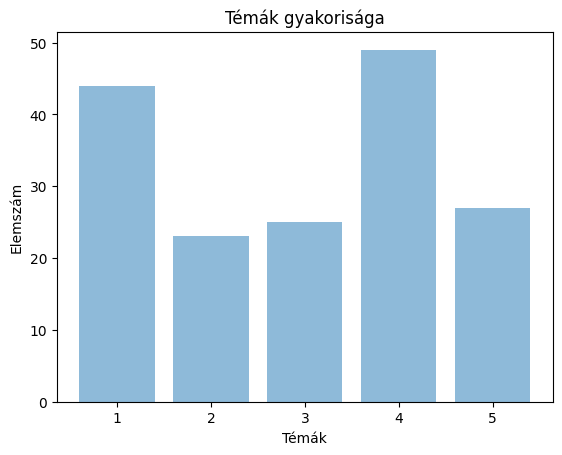

In [159]:
import matplotlib.pyplot as plt

# Számláló létrehozása a témák gyakoriságának számolására
topic_counts = [list(dominant_topics).count(i) for i in range(5)]  # Itt feltételezzük, hogy 5 témánk van

# X és Y tengely értékeinek beállítása
topics = range(1, len(topic_counts) + 1)
counts = topic_counts

# Diagram kirajzolása
plt.bar(topics, counts, align='center', alpha=0.5)
plt.xlabel('Témák')
plt.ylabel('Elemszám')
plt.title('Témák gyakorisága')
plt.show()


In [160]:
# A korábban létrejött „lda” objektum felhasználásával transzformáljuk a dokumentum-
# kifejezés mátrixunkat (amin az LDA-becslést is végeztük). A transzformáció
# eredménye megjelenik előttünk: egy tömböt látunk, mely a szövegkorpusz
# mindegyik dokumentumára nézve megadja, hogy milyen súlyt kapott
# az öt, az LDA művelete által azonosított téma (a nagyobb értékek természetesen
# magasabb súlyt kapnak). Nincs más teendőnk a domináns téma azonosításához,
# mint hogy soronként (cikkenként) azonosítsuk a maximális értéketm és
# határozzuk meg az értékhez tartozó oszlop sorszámát (az oszlopok sorszámai
# megfelelnek az előzőekben taglalt témák számainak). A matematikai műveletekre
# kiválóan hasznosítható numpy Python könyvtárral ezt egyszerűen végre
# tudjuk hajtani.
dominant_topics = np.argmax(lda_doc_topics, axis=1)

In [161]:
dominant_topics = np.argmax(lda_doc_topics, axis=1)
# A dominant_topics változó már mindegyik dokumentumra nézve tartalmazza
# az adott cikk domináns témáját (pontosabban annak sorszámát). Adjunk hozzá
# egy új oszlopot a kezdeti adatbázisunkhoz, mely ezeket a témaazonosítókat
# tartalmazza!
corpus_df['lda_doc_topics'] = dominant_topics
corpus_df.head(10)

,url,text,cluster_membership,lda_doc_topics
0,http://napimigrans.com/egykori-szexrabszolgakb...,"2016-02-11 Több száz, egykor az ISIS fogságába...",1,1
1,http://napimigrans.com/egy-muszlim-rab-megprob...,2016-02-12 Washington – A 25 éves muszlim fogv...,4,3
2,http://napimigrans.com/magyarorszag-fele-szori...,2016-02-21 Horvátország nem engedi tovább a Sz...,2,0
3,http://napimigrans.com/vajon-mikor-hal-meg-az-...,"2016-02-24 A népvándorlás nem más, mint egy ol...",1,3
4,http://napimigrans.com/a-parizsi-gyilkosok-sem...,2016-02-16 MILOS ZEMAN A KORÁNRA HIVATKOZIK – ...,1,4
5,http://napimigrans.com/verfurdot-rendezett-az-...,2016-02-09 Több mint 300 embert végeztek ki az...,0,2
6,http://napimigrans.com/video-oriasi-tuntetes-a...,2016-02-21 Minnesota – Úgy látszik az USA-ban ...,1,3
7,http://napimigrans.com/video-220-milliot-kolte...,"2016-02-24 Még 2014-ben szó volt róla, hogy né...",0,3
8,http://napimigrans.com/hogyan-romboljuk-le-a-h...,2016-02-21 Az értékek viszonylagosak. Más kult...,1,2
9,http://napimigrans.com/europa-megeroszakolasa-...,2016-02-18 Meghökkentő címlappal jelent meg a ...,1,3


In [163]:
# Eredményeink érvényességének megállapítása érdekében vessük össze a klaszterezés
# során kapott klasztertagságokat és a domináns témák azonosítóit! Ehhez
# 142 • KuVan
# számítsunk kereszttáblát az adatbázis klasztertagságokat és a domináns témák
# sorszámait tartalmazó változók között!
# cluster_topic_crosstab = pd.crosstab(corpus_df['dominant_topics'], corpus_
# df['cluster_membership']).as_matrix()
# cluster_topic_crosstab

In [164]:
import pandas as pd

# Kereszt-táblázat létrehozása a klasztertagságok és a domináns témák között
cluster_topic_crosstab = pd.crosstab(corpus_df['lda_doc_topics'], corpus_df['cluster_membership'])

# Kereszt-táblázat megjelenítése
print(cluster_topic_crosstab)


cluster_membership   0   1   2  3  4
lda_doc_topics                      
0                    2  19  17  5  1
1                    5  14   0  4  0
2                    5  10   7  1  2
3                   16  22   2  6  3
4                    3  10   8  5  1


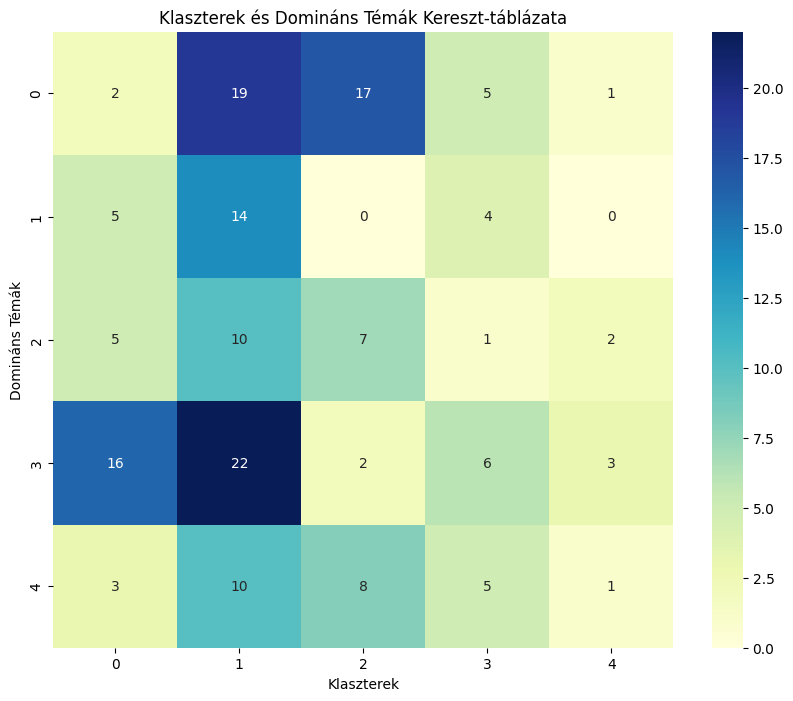

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kereszt-táblázat létrehozása a klasztertagságok és a domináns témák között
cluster_topic_crosstab = pd.crosstab(corpus_df['lda_doc_topics'], corpus_df['cluster_membership'])

# Heat map megjelenítése
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_topic_crosstab, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.title('Klaszterek és Domináns Témák Kereszt-táblázata')
plt.xlabel('Klaszterek')
plt.ylabel('Domináns Témák')
plt.show()


In [166]:
import pandas as pd
from scipy.stats import chi2_contingency

# Kereszt-táblázat létrehozása a klasztertagságok és a domináns témák között
cluster_topic_crosstab = pd.crosstab(corpus_df['lda_doc_topics'], corpus_df['cluster_membership'])

# Khi-négyzet teszt végrehajtása
chi2_stat, p_value, dof, expected = chi2_contingency(cluster_topic_crosstab)

# Eredmények kiírása
print("Khi-négyzet statisztika:", chi2_stat)
print("P-érték:", p_value)
print("Szabadsági fok:", dof)
print("Várható gyakoriságok:\n", expected)


Khi-négyzet statisztika: 38.42449831284746
P-érték: 0.001315986405395643
Szabadsági fok: 16
Várható gyakoriságok:
 [[ 8.11904762 19.64285714  8.9047619   5.5         1.83333333]
 [ 4.24404762 10.26785714  4.6547619   2.875       0.95833333]
 [ 4.61309524 11.16071429  5.05952381  3.125       1.04166667]
 [ 9.04166667 21.875       9.91666667  6.125       2.04166667]
 [ 4.98214286 12.05357143  5.46428571  3.375       1.125     ]]
